# **EDA Y  VISUALIZACION**

 **LIMPIEZA DE DATOS**

---



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRX3qYgKY_HhH80-IoLjFKccglz16DqvWjhp3-1ggnH_Db9AtkY9sfvXuEn4a4B6mOCkrjm_ZVhVK_v/pub?output=csv'
df = pd.read_csv(url)

In [2]:
df.head(2)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [4]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [5]:
print(df.isnull().sum())
print(df.duplicated().sum())

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64
0


In [6]:
df = df.set_index('Transaction ID') # reemplazo indice

In [7]:
df['Product Category'].value_counts()

,count
Product Category,
Clothing,351
Electronics,342
Beauty,307


In [8]:
#convertirlo a fecha
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [9]:
#ordeno mi df por fecha
df = df.sort_values('Date')

In [10]:
df.describe() # me doy cuenta que tengo datos desde el 1-1-23 al 1-1-24

,Date,Age,Quantity,Price per Unit,Total Amount
count,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,NaN,13.68143,1.132734,189.681356,559.997632


In [11]:
#decido ordenarlos por mes, entonces creare una columna con los meses y luego lo graficare
df['Mes']=df['Date'].dt.strftime('%Y-%m')
df.head(10)

,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Mes
Transaction ID,,,,,,,,,
522,2023-01-01,CUST522,Male,46,Beauty,3,500,1500,2023-01
180,2023-01-01,CUST180,Male,41,Clothing,3,300,900,2023-01
559,2023-01-01,CUST559,Female,40,Clothing,4,300,1200,2023-01
303,2023-01-02,CUST303,Male,19,Electronics,3,30,90,2023-01
979,2023-01-02,CUST979,Female,19,Beauty,1,25,25,2023-01
163,2023-01-02,CUST163,Female,64,Clothing,3,50,150,2023-01
421,2023-01-02,CUST421,Female,37,Clothing,3,500,1500,2023-01
610,2023-01-03,CUST610,Female,26,Beauty,2,300,600,2023-01
683,2023-01-04,CUST683,Male,38,Beauty,2,500,1000,2023-01


**GRAFICOS**

---



**VENTAS POR EDAD**

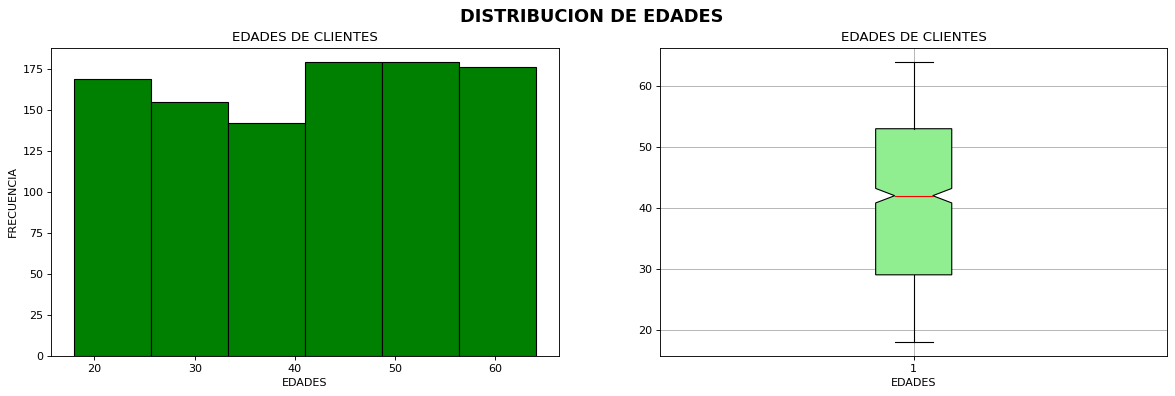


HISTOGRAMA = Se observa las 2 columnas con mayor frecuencia entre las edades de 40 y 50 años, aunque el rango de 40 años tiene 2 columnas de frecucncia
BOXPLOT = Podemos apreciar que hay un mayor incidencia de datos entre los 30 y 50 años
          siendo el rango de mayor venta entre los 40 - 45 años


In [12]:
#distribucion de ventas por rango de edad
figura = plt.figure(figsize=(18,5), dpi=80)
figura.suptitle('DISTRIBUCION DE EDADES', fontsize=16, fontweight='bold')
#Histogramas para ver la distribucion de las edades
ax = figura.add_subplot(1,2,1)
ax.hist(df['Age'], bins=6, color='green', edgecolor='black', alpha=1)

ax.set_title('EDADES DE CLIENTES')
ax.set_xlabel('EDADES')
ax.set_ylabel('FRECUENCIA')

#Boxplot para observar la distribucion de las edades
ax2 = figura.add_subplot(1,2,2)
ax2.boxplot(df['Age'], notch=True, patch_artist=True,
            boxprops=dict(facecolor='lightgreen', color='black'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'))
ax2.set_title('EDADES DE CLIENTES')
ax2.set_xlabel('EDADES')
ax2.grid()

plt.show()

print('\nHISTOGRAMA = Se observa las 2 columnas con mayor frecuencia entre las edades de 40 y 50 años, aunque el rango de 40 años tiene 2 columnas de frecucncia')
print('BOXPLOT = Podemos apreciar que hay un mayor incidencia de datos entre los 30 y 50 años')
print('          siendo el rango de mayor venta entre los 40 - 45 años')

**TENDENCIA DE VENTAS**

In [13]:
fecha = df.groupby('Mes')['Total Amount'].sum()
fecha

,Total Amount
Mes,
2023-01,35450
2023-02,44060
2023-03,28990
2023-04,33870
2023-05,53150
2023-06,36715
2023-07,35465
2023-08,36960
2023-09,23620


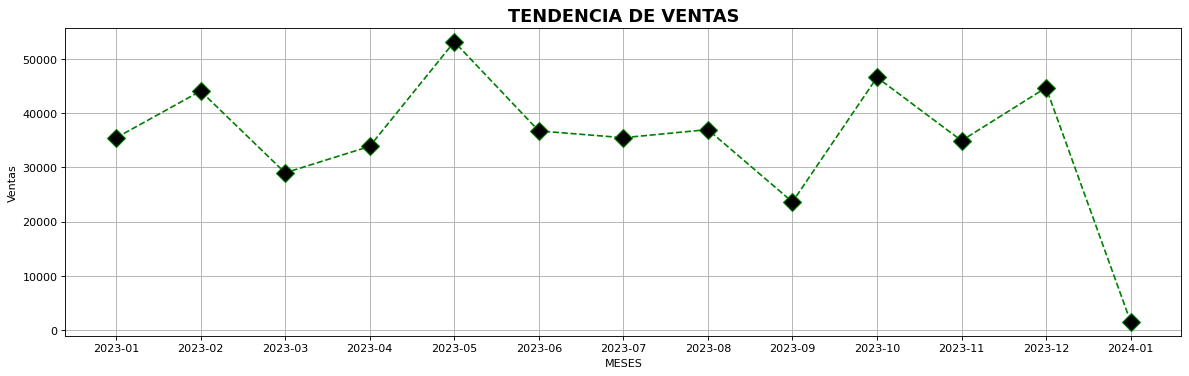


Meses con las peores ventas = MARZO Y SEPTIEMBRE
Meses con las mejores ventas = FEBRERO, MAYO, OCTUBRE Y DICIEMBRE. Siendo MAYO el mejor mes
La informacion sobre el 2024 observo que esta incompleta
Obervo que el mayo mes de ventas en el 2023 fue Mayo seguido de Octubre, Febrero y Diciembre
Observo que el en el 2024 las ventas bajaron rotundamente, esto se puede deber a 3 factores
La data del mes de enero asumiremos que esta incompleta, eliminaremos para enfocarnos solo en el 2023


In [14]:
plt.figure(figsize=(18,5), dpi=80)
plt.plot(fecha.index, fecha.values, 'D--', markerfacecolor='black', ms=12, color='green')
plt.title('TENDENCIA DE VENTAS', fontsize=16, fontweight='bold')
plt.xlabel('MESES')
plt.ylabel('Ventas')
plt.grid(True)
plt.show()
print('\nMeses con las peores ventas = MARZO Y SEPTIEMBRE')
print('Meses con las mejores ventas = FEBRERO, MAYO, OCTUBRE Y DICIEMBRE. Siendo MAYO el mejor mes')
print('La informacion sobre el 2024 observo que esta incompleta')
print('Obervo que el mayo mes de ventas en el 2023 fue Mayo seguido de Octubre, Febrero y Diciembre')
print('Observo que el en el 2024 las ventas bajaron rotundamente, esto se puede deber a 3 factores')
print('La data del mes de enero asumiremos que esta incompleta, eliminaremos para enfocarnos solo en el 2023')

In [15]:
nuevo = df[df['Mes']== '2024-01']
nuevo #Como se observa la informacion que se tiene del 2024 es muy limitada y da la impresion de estar icompleta

,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Mes
Transaction ID,,,,,,,,,
211,2024-01-01,CUST211,Male,42,Beauty,3,500,1500,2024-01
650,2024-01-01,CUST650,Male,55,Electronics,1,30,30,2024-01


In [16]:
#Eliminar columna
df = df.drop(nuevo.index)
nuevo #comprobar que se elimino

,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Mes
Transaction ID,,,,,,,,,
211,2024-01-01,CUST211,Male,42,Beauty,3,500,1500,2024-01
650,2024-01-01,CUST650,Male,55,Electronics,1,30,30,2024-01


In [17]:
fecha = df.groupby('Mes')['Total Amount'].sum()
fecha

,Total Amount
Mes,
2023-01,35450
2023-02,44060
2023-03,28990
2023-04,33870
2023-05,53150
2023-06,36715
2023-07,35465
2023-08,36960
2023-09,23620


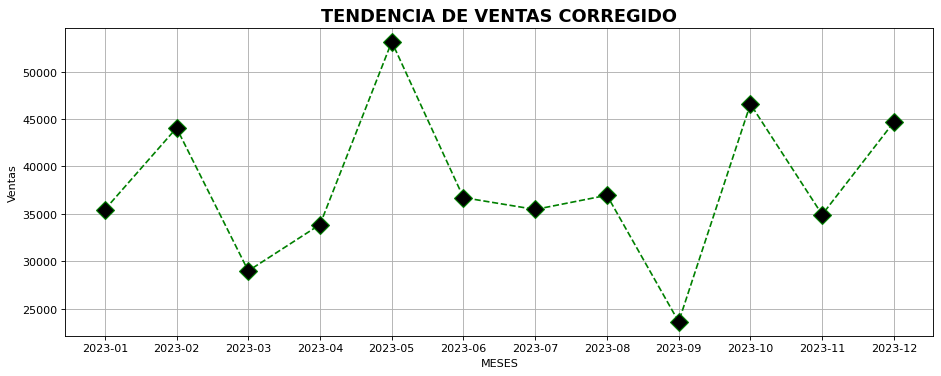


Meses con las peores ventas = MARZO Y SEPTIEMBRE
Meses con las mejores ventas = FEBRERO, MAYO, OCTUBRE Y DICIEMBRE. Siendo MAYO el mejor mes
La informacion sobre el 2024 observo que esta incompleta
Obervo que el mayo mes de ventas en el 2023 fue Mayo seguido de Octubre, Febrero y Diciembre


In [18]:
plt.figure(figsize=(14,5), dpi=80)
plt.plot(fecha.index, fecha.values, 'D--', markerfacecolor='black', ms=12, color='green')
plt.title('TENDENCIA DE VENTAS CORREGIDO', fontsize=16, fontweight='bold')
plt.xlabel('MESES')
plt.ylabel('Ventas')
plt.grid(True)
plt.show()
print('\nMeses con las peores ventas = MARZO Y SEPTIEMBRE')
print('Meses con las mejores ventas = FEBRERO, MAYO, OCTUBRE Y DICIEMBRE. Siendo MAYO el mejor mes')
print('La informacion sobre el 2024 observo que esta incompleta')
print('Obervo que el mayo mes de ventas en el 2023 fue Mayo seguido de Octubre, Febrero y Diciembre')

**VENTAS DE PRODUCTO POR EDAD**

In [19]:
df['Product Category'].value_counts() #encuentro que El producto mas vendido es CLOTHING

,count
Product Category,
Clothing,351
Electronics,341
Beauty,306


In [20]:
# ME CENTRARE EN LA EVALUACION POR EDADES DEL PRODUCTO MAS VENDIDO
ropa = df[df['Product Category']=='Clothing'].groupby('Age')['Total Amount'].sum()

In [21]:
#decido agrupar valores de 10 en 10 para graficar y no me salga disperso los valores
def funcion(valor):
  if valor > 10 and valor < 20:
    return 10
  elif valor > 20 and valor < 30:
    return 20
  elif valor > 30 and valor < 40:
    return 30
  elif valor > 40 and valor < 50:
    return 40
  elif valor > 50 and valor < 60:
    return 50
  else:
    return 60

In [22]:
df['RANGO'] = df['Age'].apply(funcion) # agrego nueva columna para determinar el rango de edades
df.info() # verifico en tipo de datos de mi columna

<class 'pandas.core.frame.DataFrame'>
Index: 998 entries, 522 to 857
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              998 non-null    datetime64[ns]
 1   Customer ID       998 non-null    object        
 2   Gender            998 non-null    object        
 3   Age               998 non-null    int64         
 4   Product Category  998 non-null    object        
 5   Quantity          998 non-null    int64         
 6   Price per Unit    998 non-null    int64         
 7   Total Amount      998 non-null    int64         
 8   Mes               998 non-null    object        
 9   RANGO             998 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 85.8+ KB


In [23]:
# ME CENTRARE EN LA EVALUACION POR EDADES DEL PRODUCTO MAS VENDIDO
ropa = df[df['Product Category']=='Clothing'].groupby('RANGO')['Total Amount'].sum()
ropa_female = df[(df['Product Category']=='Clothing') & (df['Gender']=='Female')].groupby('RANGO')['Total Amount'].sum()
ropa_male = df[(df['Product Category']=='Clothing') & (df['Gender']=='Male')].groupby('RANGO')['Total Amount'].sum()

electro = df[df['Product Category']=='Electronics'].groupby('RANGO')['Total Amount'].sum()
electro_female = df[(df['Product Category']=='Electronics') & (df['Gender']=='Female')].groupby('RANGO')['Total Amount'].sum()
electro_male = df[(df['Product Category']=='Electronics') & (df['Gender']=='Male')].groupby('RANGO')['Total Amount'].sum()

belleza = df[df['Product Category']=='Beauty'].groupby('RANGO')['Total Amount'].sum()
belleza_female = df[(df['Product Category']=='Beauty') & (df['Gender']=='Female')].groupby('RANGO')['Total Amount'].sum()
belleza_male = df[(df['Product Category']=='Beauty') & (df['Gender']=='Male')].groupby('RANGO')['Total Amount'].sum()



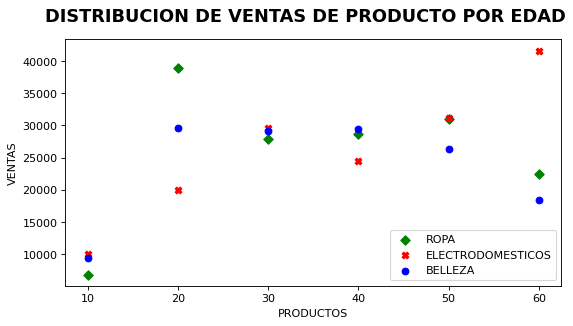


Con este grafico podemos apreciar por rango de edad que producto prebalece


<Figure size 640x480 with 0 Axes>

In [24]:
fig2 = plt.figure(figsize=(8, 4), dpi=80)
fig2.suptitle('DISTRIBUCION DE VENTAS DE PRODUCTO POR EDAD', fontsize=16, fontweight='bold')
#grafico de ropa
ff = fig2.add_subplot(1,1,1)
ff.scatter(ropa.index, ropa.values, label='ROPA', marker='D', color='green')
ff.scatter(electro.index, electro.values, label='ELECTRODOMESTICOS', marker='X', color='red')
ff.scatter(belleza.index, belleza.values, label='BELLEZA', marker='o', color='blue')
ff.legend()
ff.set_xlabel('PRODUCTOS')
ff.set_ylabel('VENTAS')
plt.show()
plt.tight_layout(rect=[0, 0, 1, 0.96])
print('\nCon este grafico podemos apreciar por rango de edad que producto prebalece')

**VENTAS DE PRODUCTO POR EDAD Y GENERO**

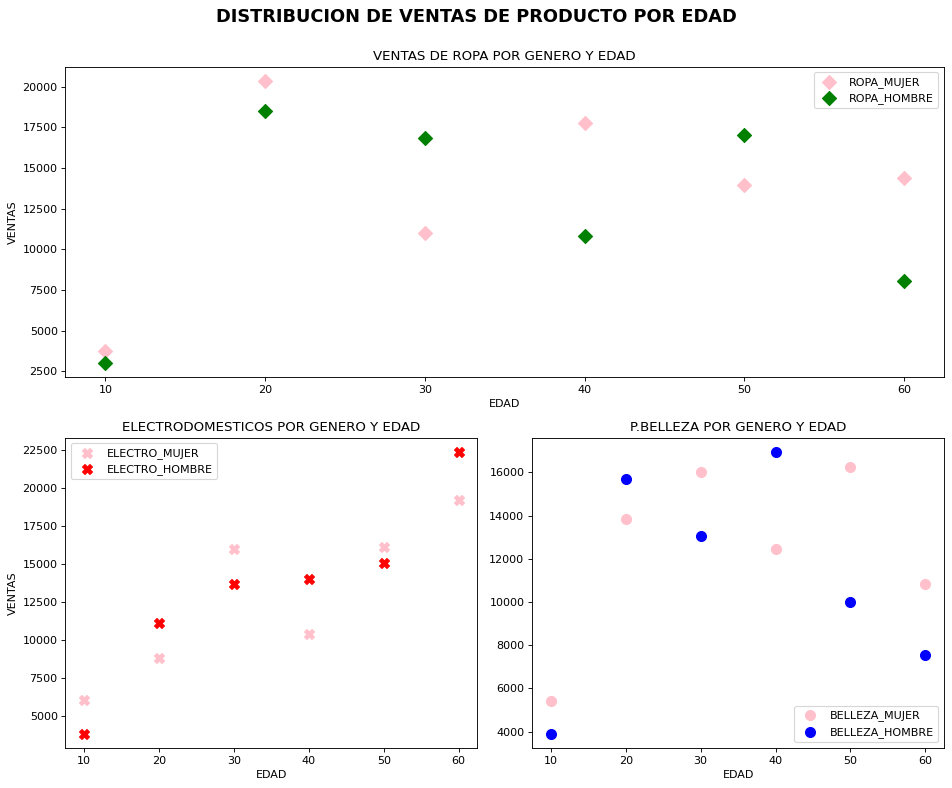

In [25]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(12,10), dpi=80)
fig.suptitle('DISTRIBUCION DE VENTAS DE PRODUCTO POR EDAD', fontsize=16, fontweight='bold')

gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1])
  #este código configura una cuadrícula de 2x2 con filas de igual altura,
  #o que te permite colocar subgráficos en una disposición organizada dentro de una figura.

# Gráfico de ropa
f = fig.add_subplot(gs[0, :])
f.scatter(ropa_female.index, ropa_female.values, label='ROPA_MUJER', marker='D', color='pink', s=80)
f.scatter(ropa_male.index, ropa_male.values, label='ROPA_HOMBRE', marker='D', color='green', s=80)
f.set_title('VENTAS DE ROPA POR GENERO Y EDAD', fontsize=12)
f.set_xlabel('EDAD')
f.set_ylabel('VENTAS')
f.legend()

# Gráfico de electrodomésticos
f2 = fig.add_subplot(gs[1, 0])
f2.scatter(electro_female.index, electro_female.values, label='ELECTRO_MUJER', marker='X', color='pink', s=80)
f2.scatter(electro_male.index, electro_male.values, label='ELECTRO_HOMBRE', marker='X', color='red', s=80)
f2.set_title('ELECTRODOMESTICOS POR GENERO Y EDAD', fontsize=12)
f2.set_xlabel('EDAD')
f2.set_ylabel('VENTAS')
f2.legend()

# Gráfico de belleza
f3 = fig.add_subplot(gs[1, 1])
f3.scatter(belleza_female.index, belleza_female.values, label='BELLEZA_MUJER', marker='o', color='pink', s=80)
f3.scatter(belleza_male.index, belleza_male.values, label='BELLEZA_HOMBRE', marker='o', color='blue', s=80)
f3.set_title('P.BELLEZA POR GENERO Y EDAD', fontsize=12)
f3.set_xlabel('EDAD')
f3.legend()

plt.tight_layout(rect=[0, 0, 1, 0.98])
#0 es la coordenada de la izquierda
#0 es la coordenada inferior
#1 es la coordenada de derecha
#0.98 coordenada superior
plt.show()

**CORRELACION**

---



In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 998 entries, 522 to 857
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              998 non-null    datetime64[ns]
 1   Customer ID       998 non-null    object        
 2   Gender            998 non-null    object        
 3   Age               998 non-null    int64         
 4   Product Category  998 non-null    object        
 5   Quantity          998 non-null    int64         
 6   Price per Unit    998 non-null    int64         
 7   Total Amount      998 non-null    int64         
 8   Mes               998 non-null    object        
 9   RANGO             998 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 85.8+ KB


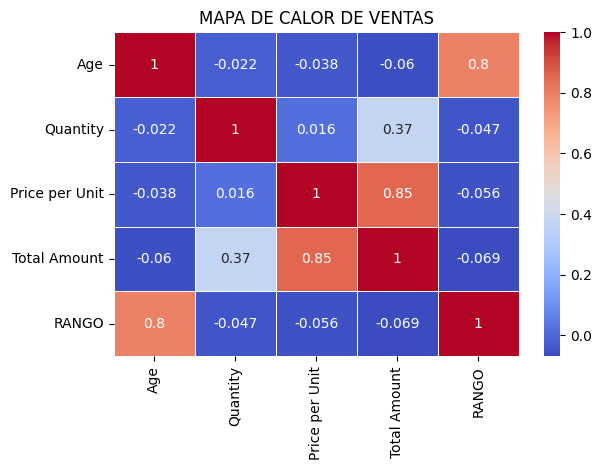


Observo una relacion directamente proporcional entre Price per Unit con Total Amount
Los demas valores no me percato ninguna relacion ni dp ni ip


In [27]:
dff = df[['Age','Quantity','Price per Unit','Total Amount', 'RANGO']]
correlacion = dff.corr()
plt.figure(dpi=100)
sns.heatmap(correlacion, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('MAPA DE CALOR DE VENTAS')
plt.tight_layout()
plt.show()
print('\nObservo una relacion directamente proporcional entre Price per Unit con Total Amount')
print('Los demas valores no me percato ninguna relacion ni dp ni ip')

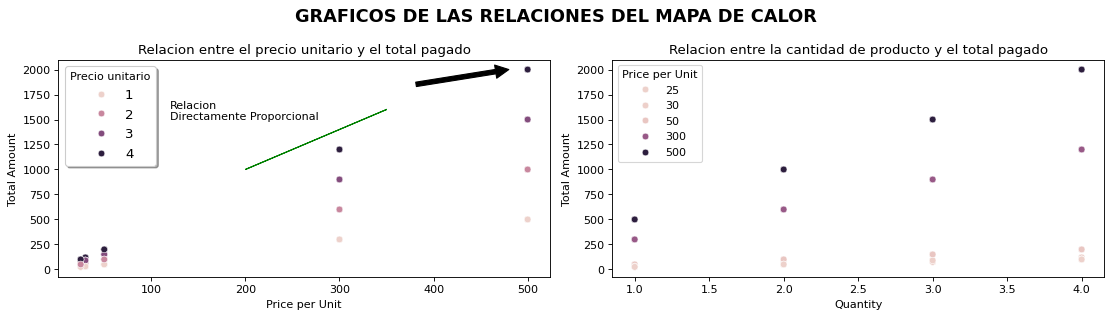

In [28]:
#GRAFICO DE RELACIONES DEL MAPA DE CALOR
fig, axs = plt.subplots(1,2, figsize=(14,4), dpi=80)
fig.suptitle('GRAFICOS DE LAS RELACIONES DEL MAPA DE CALOR', fontsize=16, fontweight='bold')
plt.style.use('_mpl-gallery')

sns.scatterplot(data=dff, x='Price per Unit', y='Total Amount', hue='Quantity', ax=axs[0])
axs[0].set_title('Relacion entre el precio unitario y el total pagado')
axs[0].legend(loc='upper left', fontsize='large', shadow=True, title='Cantidades')
axs[0].annotate('Relacion\nDirectamente Proporcional', xy=(480,2000), xytext=(120,1500),
                arrowprops=dict(facecolor='black', shrink=0.5))
axs[0].arrow(200,1000,150,600, head_width=0.8, head_length=0.5, fc='green', ec='green')

sns.scatterplot(data=dff, x='Quantity', y='Total Amount',hue='Price per Unit', ax=axs[1], color='red')
axs[1].set_title('Relacion entre la cantidad de producto y el total pagado')
axs[0].legend(loc='upper left', fontsize='large', shadow=True, title='Precio unitario')

plt.tight_layout()
plt.show()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 998 entries, 522 to 857
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              998 non-null    datetime64[ns]
 1   Customer ID       998 non-null    object        
 2   Gender            998 non-null    object        
 3   Age               998 non-null    int64         
 4   Product Category  998 non-null    object        
 5   Quantity          998 non-null    int64         
 6   Price per Unit    998 non-null    int64         
 7   Total Amount      998 non-null    int64         
 8   Mes               998 non-null    object        
 9   RANGO             998 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 85.8+ KB


In [30]:
df = df.sort_values(by='Transaction ID')#ordenar valores por el indice

In [31]:
df.head()

,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Mes,RANGO
Transaction ID,,,,,,,,,,
1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023-11,30
2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023-02,20
3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023-01,60
4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023-05,30
5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023-05,60


In [32]:
import os
import datetime as dt
now = dt.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
contador = 1
carpeta = '/content/drive/MyDrive/CODING_DOJO/MODULO2_MACHINE_LEARNING/CORE/PROYECTOS/PREDICCION_VENTAS_RETAIL/PROYECTO1_FINAL/DATA'
archivo = 'EDA_PREDICCION_VENTAS'

nombre = f'{archivo}_{now}_{contador}.csv'
ruta  = os.path.join(carpeta, nombre)
df.to_csv(ruta, index=False)
